# III. Data Analysis

Play with dataset!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'ukraine-query-tweets-feature-rt'

In [3]:
# Lire le fichier CSV et créer un dataframe
tweets_df = pd.read_csv(filename +'.csv')
display(tweets_df)

,user-followersCount,user-friendsCount,user-statusesCount,user-favouritesCount,user-listedCount,user-mediaCount,charCount,emojiCount,emojiCharRatio,wordCount,wordRatio,hashtagCount,user-totalActivity,user-tweetsPerYear,user-totalActivityPerYear,retweetCount
0,417,863,21225,95100,0,44,140,0,0.000000,22,0.157143,0,116325,1513.997459,8297.562048,1
1,1920,2207,40311,78181,87,7865,279,0,0.000000,39,0.139785,0,118492,2825.718264,8306.045708,2
2,8,107,108,1410,1,6,287,0,0.000000,49,0.170732,0,1518,54.074074,760.041152,1
3,6794,1992,121200,105956,56,6948,26,0,0.000000,5,0.192308,0,227156,116722.955145,218765.013193,2
4,546,612,4880,18726,75,188,136,0,0.000000,20,0.147059,1,23606,342.340957,1656.004228,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23261,899,954,3919,9586,3,632,107,0,0.000000,14,0.130841,0,13505,2100.491924,7238.362702,1
23262,702,793,15282,12355,0,512,137,0,0.000000,29,0.211679,0,27637,25125.810811,45439.211712,1
23263,4827,2880,81470,46838,53,216,97,0,0.000000,16,0.164948,0,128308,5620.213570,8851.336231,1
23264,367,2712,2699,2654,2,145,23,1,0.043478,4,0.173913,0,5353,493.554609,978.880261,3


## 1. Basical analysis

In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23266 entries, 0 to 23265
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user-followersCount        23266 non-null  int64  
 1   user-friendsCount          23266 non-null  int64  
 2   user-statusesCount         23266 non-null  int64  
 3   user-favouritesCount       23266 non-null  int64  
 4   user-listedCount           23266 non-null  int64  
 5   user-mediaCount            23266 non-null  int64  
 6   charCount                  23266 non-null  int64  
 7   emojiCount                 23266 non-null  int64  
 8   emojiCharRatio             23266 non-null  float64
 9   wordCount                  23266 non-null  int64  
 10  wordRatio                  23266 non-null  float64
 11  hashtagCount               23266 non-null  int64  
 12  user-totalActivity         23266 non-null  int64  
 13  user-tweetsPerYear         23266 non-null  flo

In [5]:
print(tweets_df[['retweetCount']].describe())


       retweetCount
count  23266.000000
mean      22.648027
std      139.916614
min        1.000000
25%        1.000000
50%        2.000000
75%        7.000000
max     4891.000000


<AxesSubplot:xlabel='retweetCount'>

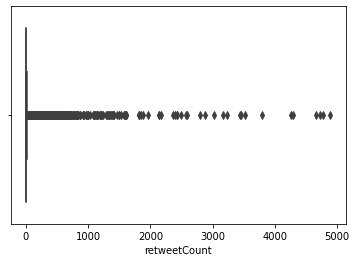

In [6]:
sns.boxplot(x=tweets_df.retweetCount)

<AxesSubplot:xlabel='retweetCount', ylabel='Count'>

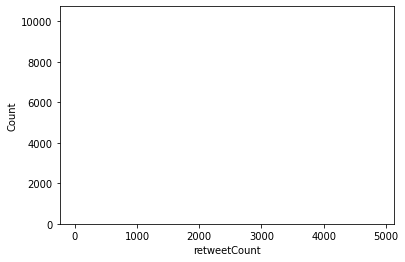

In [7]:
sns.histplot(x=tweets_df.retweetCount)


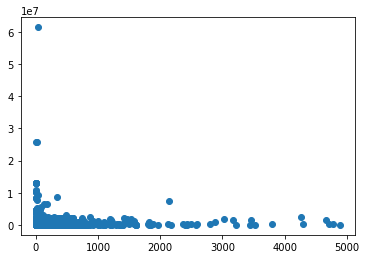

In [8]:
plt.scatter(tweets_df.retweetCount,tweets_df['user-followersCount'])
plt.show()


In [9]:
"""
sns.boxplot(
    x="Matiere",
    y="value",
    data=note_par_matiere
)
"""

'\nsns.boxplot(\n    x="Matiere",\n    y="value",\n    data=note_par_matiere\n)\n'

<AxesSubplot:>

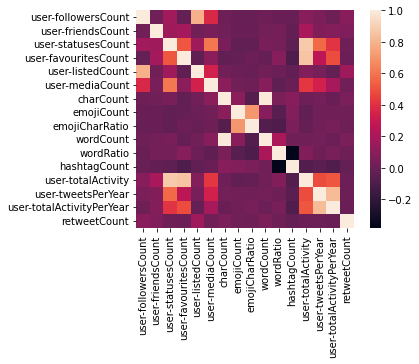

In [10]:
corr = tweets_df.corr()
sns.heatmap(corr,square=True)

## PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
def add_labels(x,y,labels,ax=None):
    if ax is None:
        ax=plt.gca()
        for x,y,label in zip(x,y,labels):
            ax.annotate(
                label, [x,y], xytext=(10,-5), textcoords="offset points",
            )
        return ax

In [13]:
from sklearn.preprocessing import MinMaxScaler

def normalisation(data):
    scaler = MinMaxScaler(feature_range=(0,1))
    data_norme = pd.DataFrame(scaler.fit_transform(data))
    return data_norme


In [14]:
tweets_df = normalisation(tweets_df)
tweets_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.788683e-06,0.001432,0.011303,0.080166,0.000000,0.000056,0.016317,0.000000,0.000000,0.018135,0.433026,0.000000,0.049378,0.002980,0.014748,0.000000
1,3.125725e-05,0.003663,0.021468,0.065904,0.000548,0.009935,0.032993,0.000000,0.000000,0.032815,0.357447,0.000000,0.050297,0.005562,0.014763,0.000204
2,1.302385e-07,0.000178,0.000057,0.001189,0.000006,0.000008,0.033953,0.000000,0.000000,0.041451,0.492195,0.000000,0.000644,0.000106,0.001348,0.000000
3,1.106051e-04,0.003306,0.064547,0.089317,0.000353,0.008777,0.002639,0.000000,0.000000,0.003454,0.586141,0.000000,0.096424,0.229797,0.388891,0.000204
4,8.888779e-06,0.001016,0.002598,0.015785,0.000473,0.000237,0.015837,0.000000,0.000000,0.016408,0.389118,0.020408,0.010020,0.000673,0.002941,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23261,1.463555e-05,0.001584,0.002087,0.008081,0.000019,0.000798,0.012358,0.000000,0.000000,0.011226,0.318504,0.000000,0.005732,0.004135,0.012865,0.000000
23262,1.142843e-05,0.001316,0.008138,0.010415,0.000000,0.000647,0.015957,0.000000,0.000000,0.024180,0.670486,0.000000,0.011731,0.049466,0.080774,0.000000
23263,7.858267e-05,0.004780,0.043388,0.039483,0.000334,0.000273,0.011158,0.000000,0.000000,0.012953,0.467013,0.000000,0.054464,0.011064,0.015732,0.000000
23264,5.974692e-06,0.004502,0.001437,0.002237,0.000013,0.000183,0.002280,0.020833,0.282609,0.002591,0.506047,0.000000,0.002272,0.000971,0.001737,0.000409


In [15]:
cls = PCA(n_components=5)
pcs = cls.fit_transform(tweets_df)
print(cls.components_)


[[ 4.12036300e-03  2.85211523e-02  2.89481646e-01  4.90278448e-01
   4.86307022e-03  7.07544019e-02  4.91196960e-03 -1.44259632e-02
  -2.16127590e-02  2.46288121e-02  5.10690005e-01 -1.73869596e-01
   4.77615805e-01  1.73452068e-01  3.45574951e-01  1.33609171e-03]
 [ 4.09356566e-03  1.41344966e-02  2.01075027e-01  2.86676069e-01
   4.10237643e-03  6.75457073e-02 -1.10167860e-02  1.66718210e-02
   3.88539335e-02 -4.28883632e-02 -8.15151432e-01  1.99027269e-01
   3.04625301e-01  1.30944313e-01  2.34114338e-01 -2.30013151e-03]
 [-7.10994365e-04 -2.54347052e-02 -7.25262015e-02 -4.08655166e-01
  -3.34448878e-03  2.16236761e-02 -3.32319831e-03  4.01470170e-02
   6.90056484e-02 -2.04911356e-03 -1.60560101e-02 -1.68068588e-01
  -2.63589588e-01  4.40125622e-01  7.27001381e-01 -1.18232255e-04]
 [ 5.05579445e-03 -4.31031690e-03  1.08438438e-01 -1.35225181e-01
   1.88901162e-03  6.91629023e-02  1.25433039e-01  4.55049991e-02
   7.14470825e-03  1.40027627e-01  2.51265675e-01  9.18613831e-01
   1.83

<BarContainer object of 5 artists>

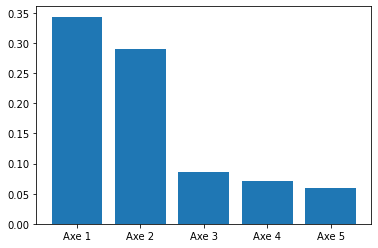

In [16]:
plt.bar(["Axe 1","Axe 2","Axe 3","Axe 4","Axe 5"], cls.explained_variance_ratio_)

In [17]:
tweets_df_index = tweets_df

In [18]:
tweets_df = tweets_df.to_numpy()

In [19]:
n,p = tweets_df.shape
M = np.eye(p)
Dp = 1/n * np.eye(n)

In [20]:
mean = tweets_df.mean(axis=0)
tweets_df = tweets_df - mean

In [21]:
V = tweets_df.T @ Dp @ tweets_df

In [22]:
import scipy.linalg as linalg
valp, vecp = linalg.eigh(V @ M)
valp = valp[::-1] # Ordre décroissant
vecp = vecp[:, ::-1]

In [23]:
C = tweets_df @ M @ vecp

In [24]:
inverseDesEcartType = np.zeros(p)
for i in range(p):
    inverseDesEcartType[i]=1/tweets_df[:,i].std()
inverseDesEcartType


array([104.1284661 ,  55.17060465,  21.54184119,  14.64059337,
        65.35120434,  37.26017551,  44.05907047,  38.83607703,
        26.57264003,  38.95796822,  10.15432676,  18.4802157 ,
        16.09761651,  27.84784181,  16.46552605,  34.95013889])

In [25]:
data_reduction = tweets_df * inverseDesEcartType
data_reduction

array([[-0.09359885, -0.1674981 , -0.24330216, ..., -0.48157942,
        -0.41814774, -0.15472424],
       [-0.09105097, -0.04441852, -0.0243376 , ..., -0.40966387,
        -0.41789942, -0.14757698],
       [-0.09429218, -0.23673036, -0.48556743, ..., -0.56162022,
        -0.63877368, -0.15472424],
       ...,
       [-0.08612305,  0.01721285,  0.44785997, ..., -0.2564547 ,
        -0.40193857, -0.15472424],
       [-0.09368361,  0.0018279 , -0.45584212, ..., -0.53752555,
        -0.63236818, -0.14042971],
       [-0.0913578 , -0.03407031, -0.15681081, ..., -0.34242984,
        -0.52743105, -0.15472424]])

In [26]:
from math import sqrt

In [27]:
termeAvecLambda = np.zeros(p)
for i in range(p):
    termeAvecLambda[i] = sqrt(valp[i])
termeAvecLambda= 1/termeAvecLambda
termeAvecLambda

array([9.28913293e+00, 1.01027140e+01, 1.85123004e+01, 2.04643984e+01,
       2.24887373e+01, 2.38607655e+01, 2.99598680e+01, 3.49074493e+01,
       4.93309759e+01, 5.66122543e+01, 6.40638712e+01, 6.80561405e+01,
       7.94592576e+01, 1.96804484e+02, 5.67836125e+02, 6.07400100e+09])

In [28]:
composantesPrincipalesNormees = C * termeAvecLambda

In [29]:
cov = data_reduction.T @ Dp @ composantesPrincipalesNormees
cov

array([[-4.61880653e-02, -4.21922975e-02, -3.99921949e-03,
         2.57252674e-02,  2.74968077e-01,  1.23079814e-01,
         2.38245486e-02, -1.48145788e-01, -5.33305442e-01,
         1.09594863e-01, -6.75890870e-02,  6.05144152e-01,
        -9.43103208e-03,  4.63524432e-01, -7.21680527e-04,
         1.76572147e-08],
       [-1.69394628e-01, -7.71880435e-02, -7.58008477e-02,
        -1.16203166e-02,  1.39656806e-02,  9.07414632e-03,
        -4.12184437e-02, -8.77709369e-02,  1.64302006e-01,
         9.59149694e-01, -1.30000297e-02, -4.86348775e-02,
         1.69916138e-02, -4.73238013e-04, -1.13822936e-04,
         1.18668266e-07],
       [-6.71318593e-01, -4.28748781e-01, -8.43951254e-02,
         1.14147681e-01,  5.21993169e-01,  2.14328143e-01,
         7.98296801e-02,  1.09317601e-02,  1.18959554e-01,
        -1.63145054e-02,  3.20321133e-03,  2.09615473e-02,
        -7.47037274e-02,  2.56131846e-04,  1.59936651e-06,
        -1.80813946e-08],
       [-7.72727384e-01, -4.15443589e

In [30]:
def add_labels(x_list,y_list,labels):
    for x,y,label in zip(x_list,y_list,labels):
        plt.text(x+0.05,y-0.05,label)

C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


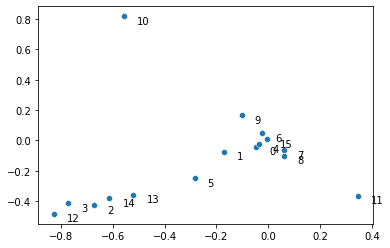

In [31]:
sns.scatterplot(cov[:,0],cov[:,1])
add_labels(cov[:,0],cov[:,1], tweets_df_index.head())

 0   user-followersCount 
 1   user-friendsCount   
 2   user-statusesCount  
 3   user-favouritesCount
 4   user-listedCount    
 5   user-mediaCount     
 6   retweetCount 

In [32]:
tweets_df_index.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,6.788683e-06,0.001432,0.011303,0.080166,0.000000,0.000056,0.016317,0.0,0.0,0.018135,0.433026,0.000000,0.049378,0.002980,0.014748,0.000000
1,3.125725e-05,0.003663,0.021468,0.065904,0.000548,0.009935,0.032993,0.0,0.0,0.032815,0.357447,0.000000,0.050297,0.005562,0.014763,0.000204
2,1.302385e-07,0.000178,0.000057,0.001189,0.000006,0.000008,0.033953,0.0,0.0,0.041451,0.492195,0.000000,0.000644,0.000106,0.001348,0.000000
3,1.106051e-04,0.003306,0.064547,0.089317,0.000353,0.008777,0.002639,0.0,0.0,0.003454,0.586141,0.000000,0.096424,0.229797,0.388891,0.000204
4,8.888779e-06,0.001016,0.002598,0.015785,0.000473,0.000237,0.015837,0.0,0.0,0.016408,0.389118,0.020408,0.010020,0.000673,0.002941,0.000000
